In [1]:
#Importing the necessary Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
#Reading the data

data = pd.read_excel("ANZ.xlsx")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
#Checking if 100 unique account values are there or not
data["account"].nunique()

100

In [5]:
#number of date values
data["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [6]:
#the number of values for customer id
data["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [7]:
#Values of the columns

data.columns.values

array(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'], dtype=object)

The dataset contains 12043 transactions for 100 customers who have one bank account each. Trasactional period
is from 01/08/2018 - 31/10/2018 (92 days duration). The data entries are unique and have consistent formats for
analysis. For each record/row, information is complete for majority of columns. Some columns contain missing
data (blank or NA cells), which is likely due to the nature of transaction. (i.e. merchants are not involved for
InterBank transfers or Salary payments) It is also noticed that there is only 91 unique dates in the dataset,
suggesting the transaction records for one day are missing (turned out to be 2018-08-16).

# Transaction Volume over the dates.

In [8]:
#Taking the sum of all transactions over the dates

date_group = data.groupby('date')["amount"].sum().reset_index()

In [9]:
date_group.head()

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


In [10]:
#Lineplot of the entire data

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


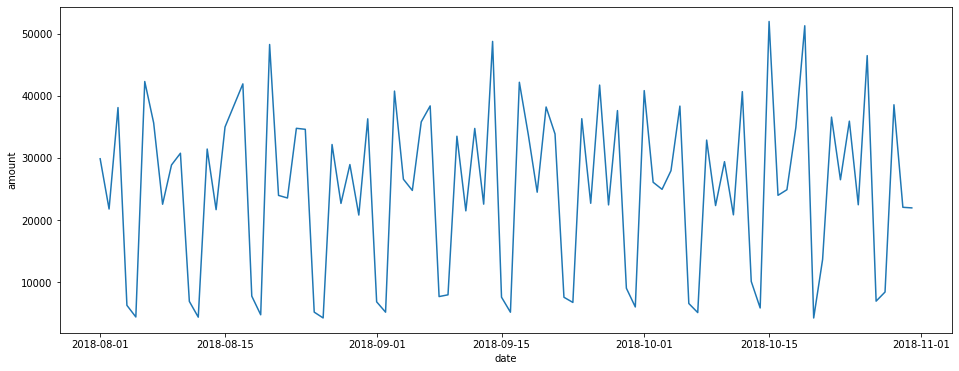

In [11]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_group)

# Mean transaction amount each day

In [12]:
#Mean transaction amount per day

date_mean = data.groupby("date")["amount"].mean().reset_index()

In [13]:
date_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


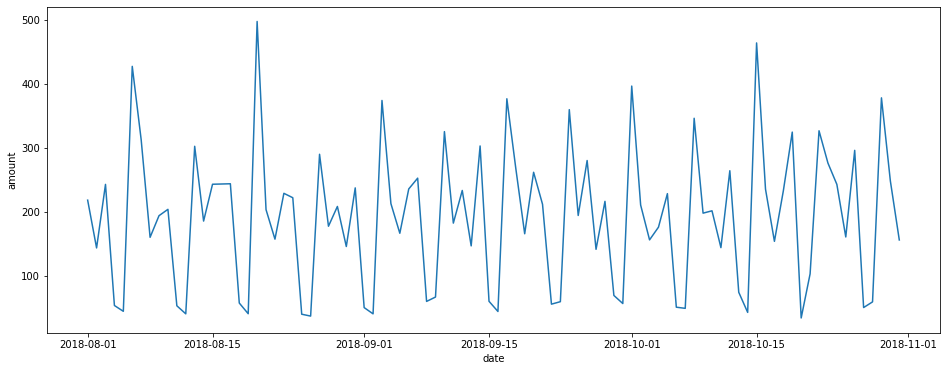

In [14]:
#Lineplot for the data
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_mean)

# Transaction Volume By Gender

In [15]:
#Transaction volume over the dates by gender

gender_vol = data[["date","amount","gender"]]
gender_vol.head()

,date,amount,gender
0,2018-08-01,16.25,F
1,2018-08-01,14.19,F
2,2018-08-01,6.42,M
3,2018-08-01,40.90,F
4,2018-08-01,3.25,F


In [16]:
gender_data = gender_vol.groupby(['date',"gender"])["amount"].sum().reset_index()
gender_data

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59
...,...,...,...
177,2018-10-29,M,22119.89
178,2018-10-30,F,11051.25
179,2018-10-30,M,11011.09
180,2018-10-31,F,13704.25


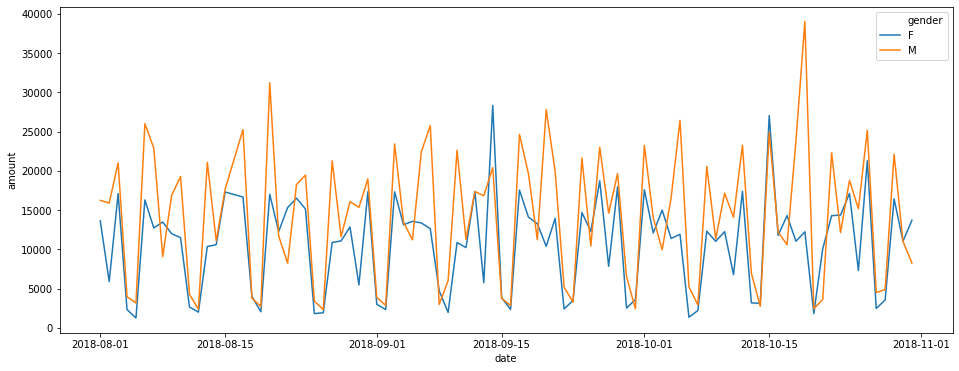

In [17]:
#Lineplot

plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender",data=gender_data)

# Mean Transaction by Gender

In [18]:
#Mean transaction over the dates by Gender

gender_mean = data.groupby(["date","gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


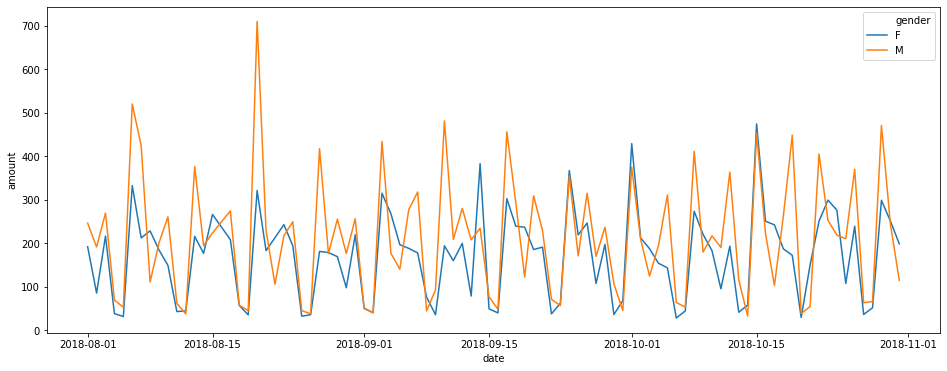

In [19]:
#Lineplot for the data

plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean)

# Transaction Volume by merchant state

In [20]:
#Transaction volume sorted by states

merchant_state = data.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


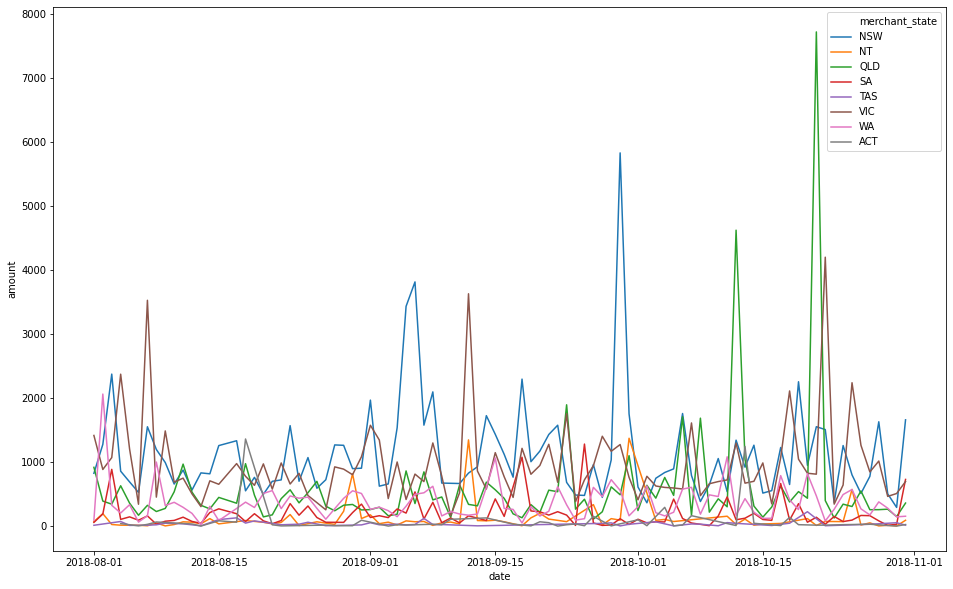

In [21]:
#Lineplot for the data

plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state)

# Transaction Volume by merchant state barplot

In [22]:
#Transaction volume by merchant state

merchant_state_total = data.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
merchant_state_total

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42
5,NT,M,427.47
6,QLD,F,28611.05
7,QLD,M,24872.40
8,SA,F,11349.73
9,SA,M,5426.84


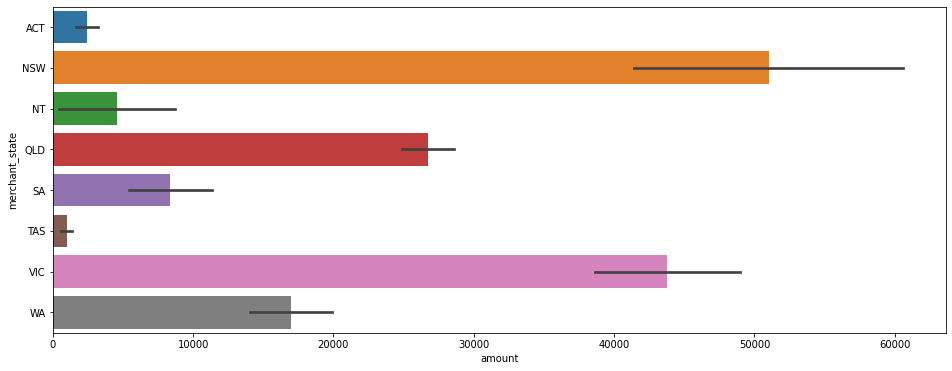

In [23]:
#Barplot

plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state",  data=merchant_state_total)

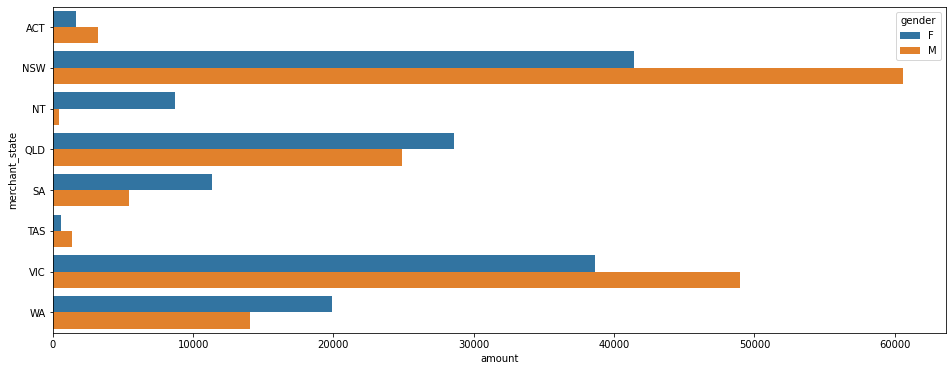

In [24]:
#Barplot according to genders

plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state", hue="gender", data=merchant_state_total)

# Mean Transaction Volume by merchant state

In [25]:
#Mean transaction volume by merchant state

merchant_state_mean = data.groupby(["date","merchant_state"])["amount"].mean().reset_index()
merchant_state_mean.head()

,date,merchant_state,amount
0,2018-08-01,NSW,29.584286
1,2018-08-01,NT,24.416667
2,2018-08-01,QLD,54.221176
3,2018-08-01,SA,15.592500
4,2018-08-01,TAS,17.130000


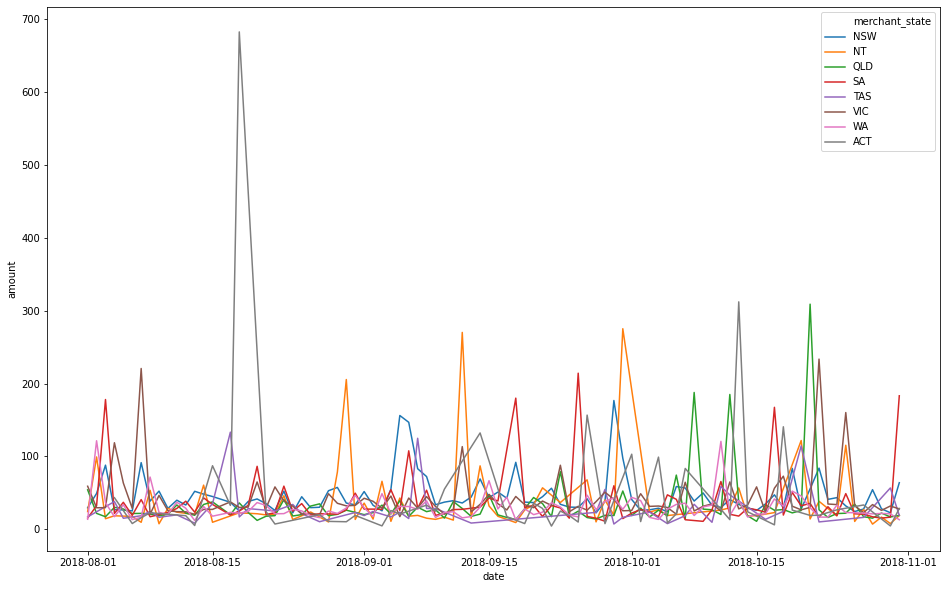

In [26]:
#Line plot for the data

plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state_mean)

# Transaction Volume by merchant suburb (sum)

In [27]:
#Transaction Volume by Merchant Suburb

merchant_suburb= data.groupby(["merchant_suburb"])["amount"].sum().reset_index()
merchant_suburb

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30
...,...,...
1604,Yulara,80.07
1605,Yungaburra,105.38
1606,Zetland,78.47
1607,Zillmere,38.63


In [28]:
suburb_sorted=merchant_suburb.sort_values(by='amount', ascending=False)
print("Top 10 regions with most value of transactions over 91 days are-")
print(suburb_sorted.head(10).values)

Top 10 regions with most value of transactions over 91 days are-
[['Sydney' 21675.44000000002]
 ['Melbourne' 11943.529999999995]
 ['South Brisbane' 11740.58]
 ['Mascot' 10282.619999999999]
 ['Mount Gambier' 4710.25]
 ['Malvern' 3994.8300000000004]
 ['Maribyrnong' 3770.8299999999995]
 ['Parap' 3323.51]
 ['Brisbane City' 2724.45]
 ['Mount Gravatt' 2721.14]]


In [29]:
#Based on transaction volume sum

tuple_suburb_sum = [tuple(x) for x in merchant_suburb.values]

(-0.5, 1399.5, 1199.5, -0.5)

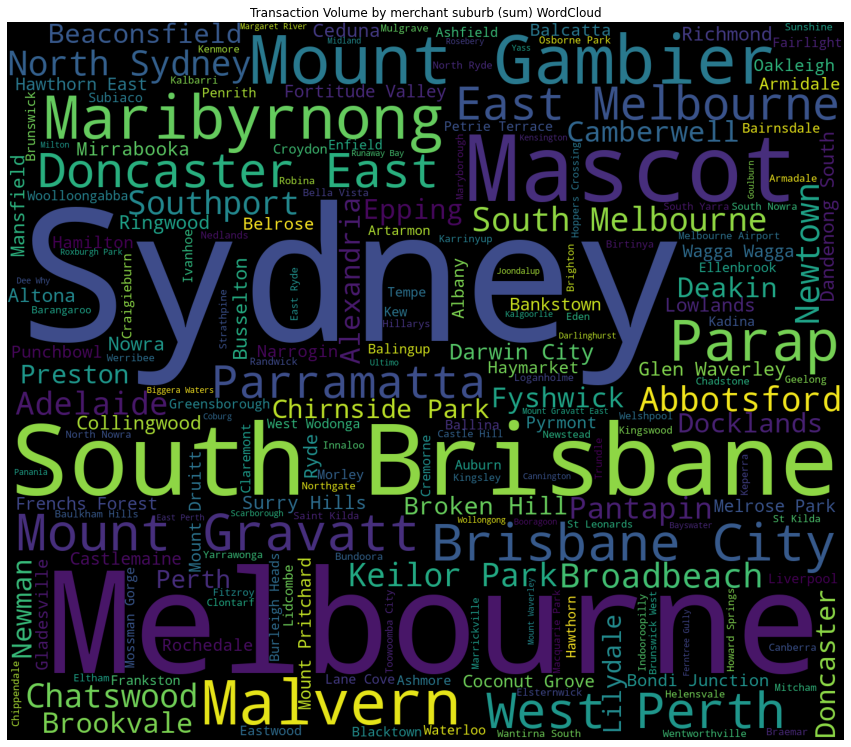

In [30]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_suburb_sum))
plt.title('Transaction Volume by merchant suburb (sum) WordCloud')

plt.imshow(wordcloud)
plt.axis("off")

# Transaction Volume by merchant suburb (mean)

In [31]:
merchant_suburb_mean= data.groupby(["merchant_suburb"])["amount"].mean().reset_index()
merchant_suburb_mean.head(5)

,merchant_suburb,amount
0,Abbotsford,400.858
1,Aberdeen,26.225
2,Aberfeldie,57.770
3,Aberfoyle Park,42.460
4,Acacia Ridge,10.300


In [32]:
suburb_sorted_mean=merchant_suburb_mean.sort_values(by='amount', ascending=False)

In [33]:
print("Top 10 regions with most mean value of transactions over 91 days are-")
print(suburb_sorted_mean.head(10).values)

Top 10 regions with most mean value of transactions over 91 days are-
[['Pantapin' 829.7650000000001]
 ['Gladesville' 734.1]
 ['West Wodonga' 559.33]
 ['South Brisbane' 559.0752380952381]
 ['Parap' 553.9183333333334]
 ['Lowlands' 524.58]
 ['Mossman Gorge' 501.67]
 ['Fairlight' 496.76]
 ['Deakin' 491.5066666666667]
 ['Mount Gravatt' 453.5233333333333]]


In [34]:
#Based on transaction value mean

tuple_suburb_mean = [tuple(x) for x in merchant_suburb_mean.values]

(-0.5, 1399.5, 1199.5, -0.5)

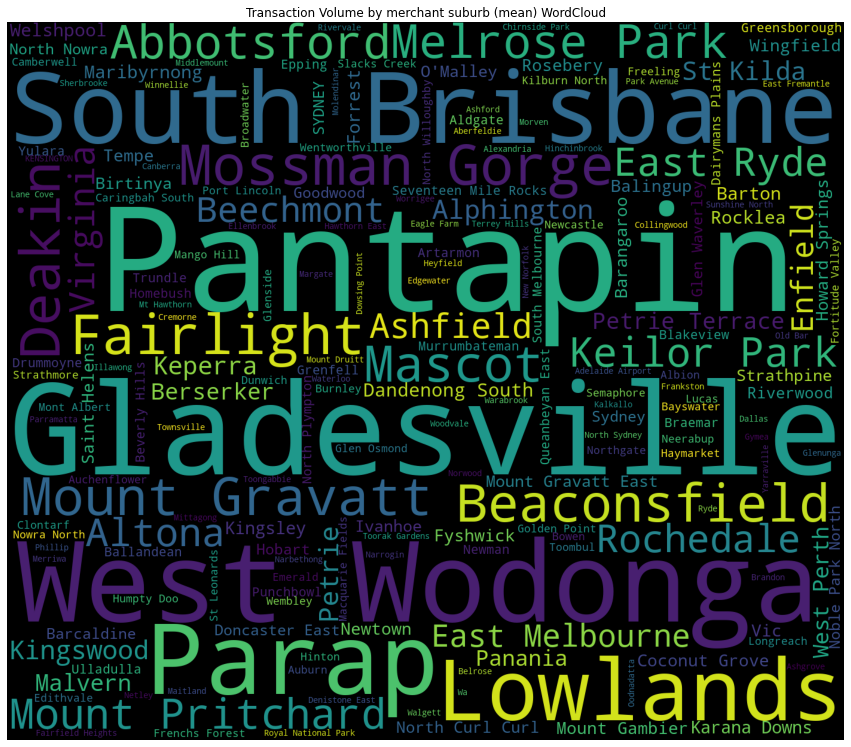

In [35]:
plt.subplots(figsize=(15,15))
wordcloud2 = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_suburb_mean))
plt.title('Transaction Volume by merchant suburb (mean) WordCloud')

plt.imshow(wordcloud2)
plt.axis("off")

# Account Balance (total-which also indicates bank assets) over the dates.

In [36]:
#Taking account balance sum over the dates

acc_bal_total= data.groupby(["date",'gender'])["balance"].sum().reset_index()
acc_bal_total.head(5)

,date,gender,balance
0,2018-08-01,F,619748.69
1,2018-08-01,M,741205.93
2,2018-08-02,F,707846.59
3,2018-08-02,M,1414623.33
4,2018-08-03,F,296789.02


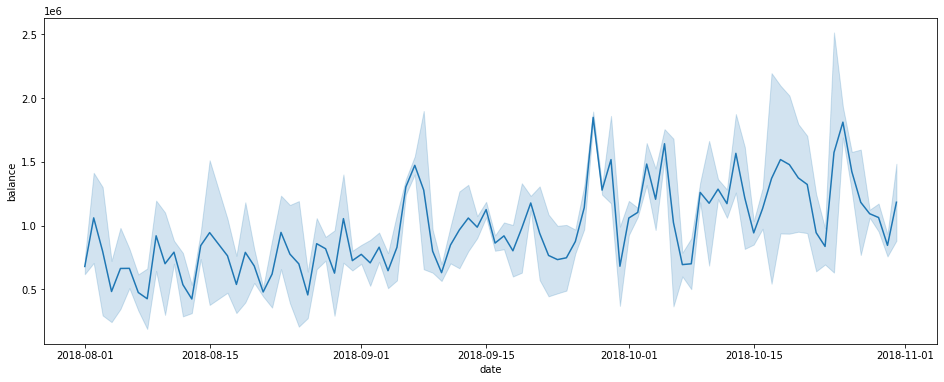

In [37]:
#lineplot for the data

plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_total)

# Account Balance (mean of all customers) over the dates.

In [38]:
#mean account balance of all customers

acc_bal_mean= data.groupby(["date",'gender'])["balance"].mean().reset_index()
acc_bal_mean.head(5)

,date,gender,balance
0,2018-08-01,F,8728.854789
1,2018-08-01,M,11230.392879
2,2018-08-02,F,10258.646232
3,2018-08-02,M,17043.654578
4,2018-08-03,F,3756.823038


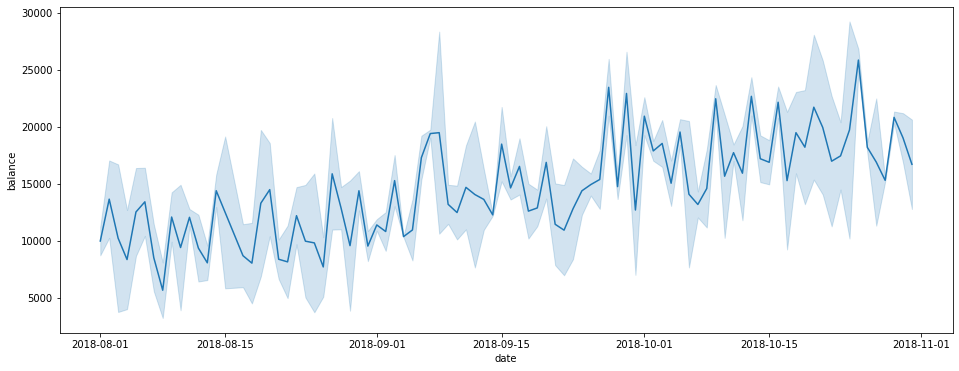

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_mean)

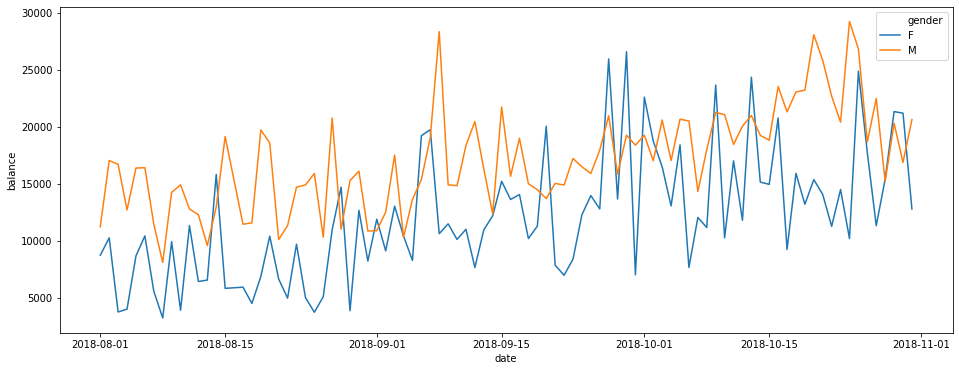

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue="gender",data=acc_bal_mean)

# Account Balance (mean of all customers)  for various states over the Dates

In [41]:
#Mean account balance over the states

acc_bal_state_mean= data.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
acc_bal_state_mean.head(5)

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,QLD,5459.165294
3,2018-08-01,SA,5728.495000
4,2018-08-01,TAS,6924.650000


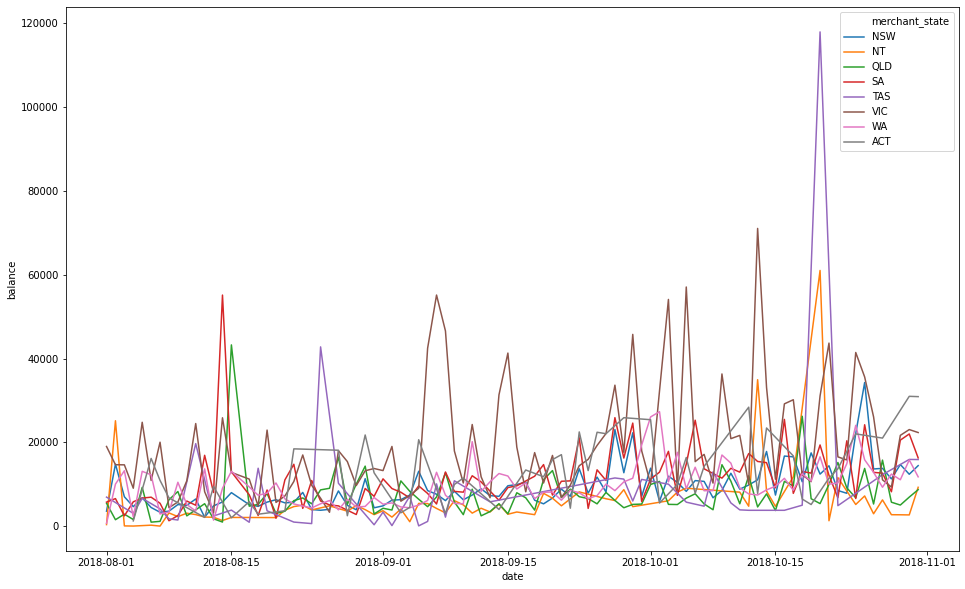

In [42]:
#Lineplot for the data

plt.figure(figsize=(16, 10))
sns.lineplot(y="balance",x="date",hue="merchant_state",data=acc_bal_state_mean)

# Account Balance (mean of all customers) for various states (all days average)

In [43]:
#Mean account balance over the states

acc_bal_state= data.groupby(['merchant_state',"gender"])["balance"].mean().reset_index()
acc_bal_state.head

<bound method NDFrame.head of    merchant_state gender       balance
0             ACT      F  14433.733913
1             ACT      M   9176.572593
2             NSW      F   8855.846765
3             NSW      M   9936.826013
4              NT      F   4730.673850
5              NT      M  38011.864000
6             QLD      F   2994.443750
7             QLD      M  11428.045648
8              SA      F  11307.189714
9              SA      M  10924.267706
10            TAS      F   2714.771875
11            TAS      M  14113.011731
12            VIC      F  22374.283856
13            VIC      M  17593.964666
14             WA      F   6261.642588
15             WA      M  14971.977517>

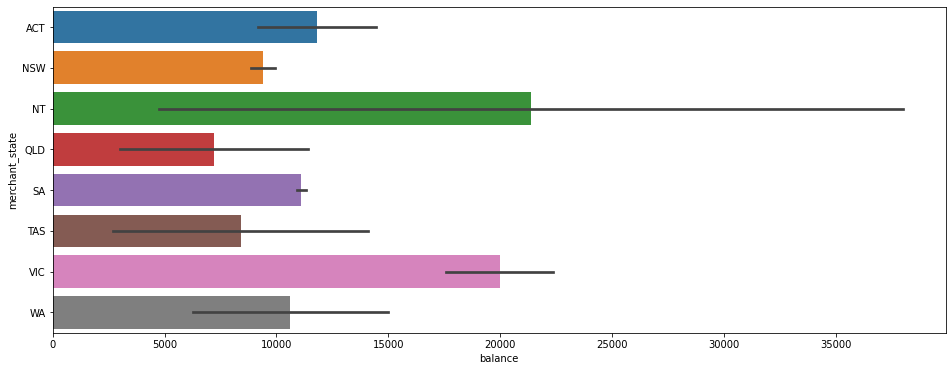

In [44]:
#Barplot for the data

plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",  data=acc_bal_state)

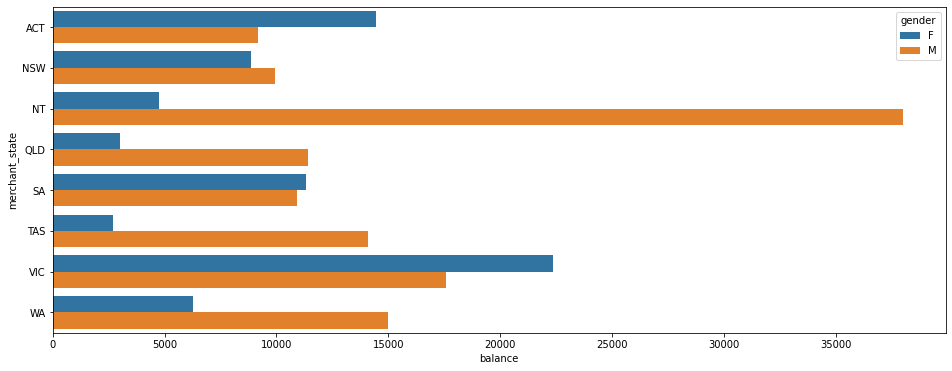

In [45]:
#Barplot sorted by gender

plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",hue="gender",  data=acc_bal_state)

# Total Transaction by Age 

In [46]:
#Sum of all transactions sorted by age

age_amount_sum= data.groupby(['age',"gender"])["amount"].sum().reset_index()
age_amount_sum.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


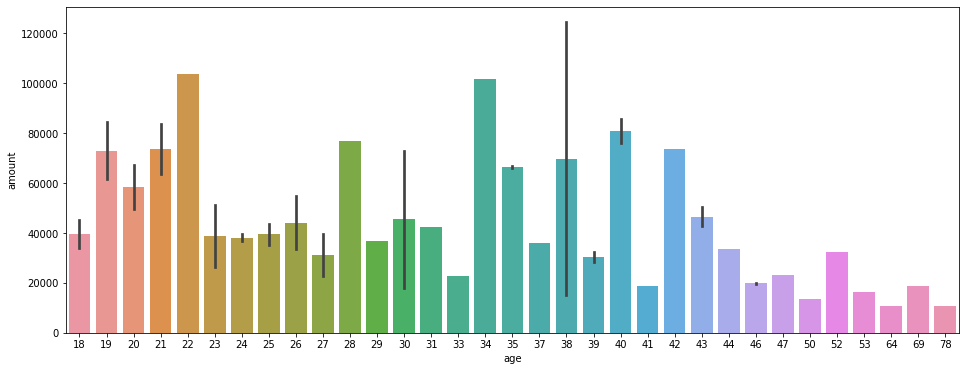

In [47]:
#Barplot for the data

plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_sum)

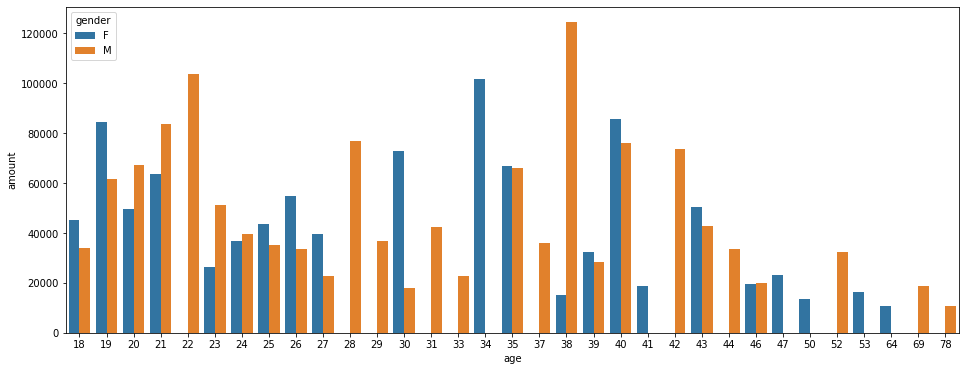

In [48]:
#Barplot with hue parameter for gender

plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender" ,data=age_amount_sum)

# Mean Transaction by Age

In [49]:
#Mean of transaction values by age

age_amount_mean= data.groupby(['age',"gender"])["amount"].mean().reset_index()
age_amount_mean.head()

,age,gender,amount
0,18,F,151.933131
1,18,M,234.624138
2,19,F,244.402319
3,19,M,177.396322
4,20,F,135.835041


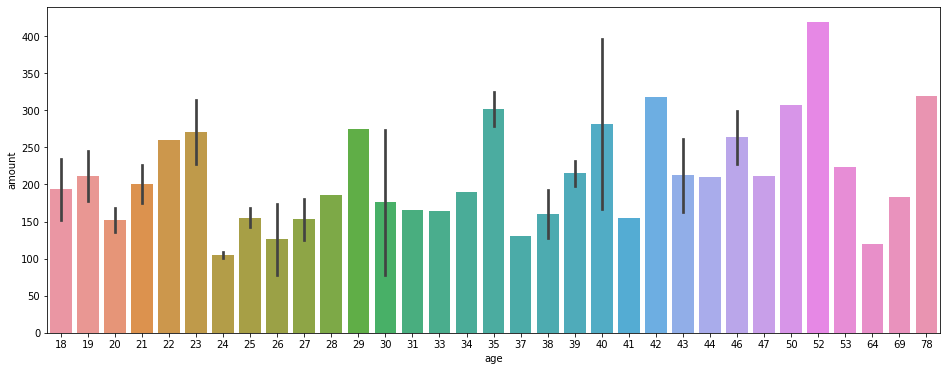

In [50]:
#Barplot for that data

plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_mean)

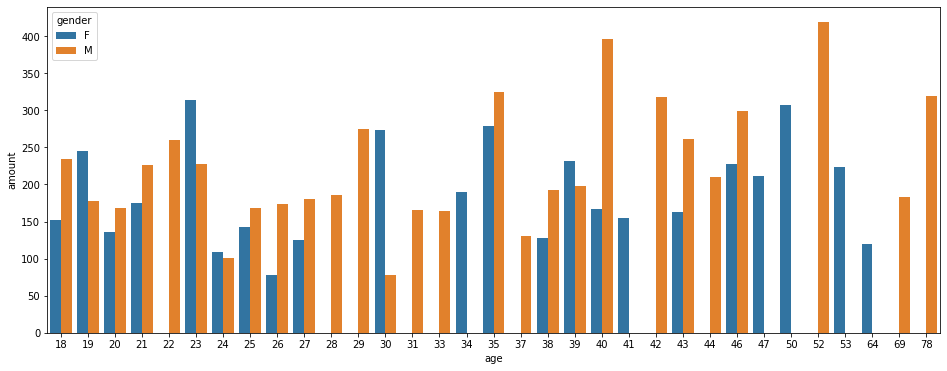

In [51]:
#Barplot with Gender as a Hue

plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender", data=age_amount_mean)

# Debit-Credit Transaction Mean analysis By Gender

In [52]:
#Analysis of debit/credit

debit_credit= data.groupby(["movement","gender"])["amount"].mean().reset_index()
debit_credit

,movement,gender,amount
0,credit,F,1679.370477
1,credit,M,2096.811681
2,debit,F,49.946881
3,debit,M,54.980407


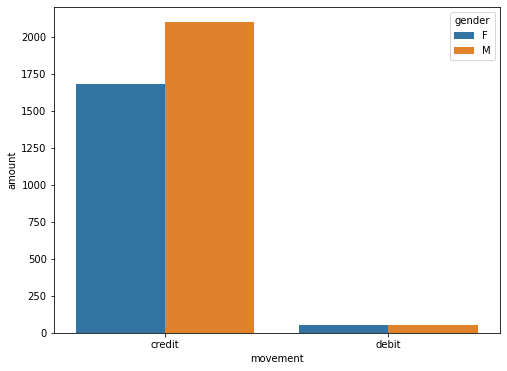

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit)

# Debit-Credit Transaction Total analysis By Gender

In [54]:
#According to gender 

debit_credit_total= data.groupby(["movement","gender"])["amount"].sum().reset_index()
debit_credit_total

,movement,gender,amount
0,credit,F,703656.23
1,credit,M,972920.62
2,debit,F,266666.40
3,debit,M,320040.95


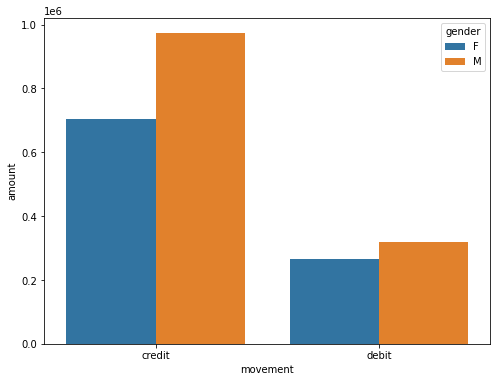

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit_total)

# Debit-Credit Transaction Sum analysis By Age

In [56]:
#By age

dc_age_total= data.groupby(["movement","age"])["amount"].sum().reset_index()
dc_age_total.head()

,movement,age,amount
0,credit,18,59762.72
1,credit,19,115785.36
2,credit,20,84511.81
3,credit,21,107137.60
4,credit,22,81124.69


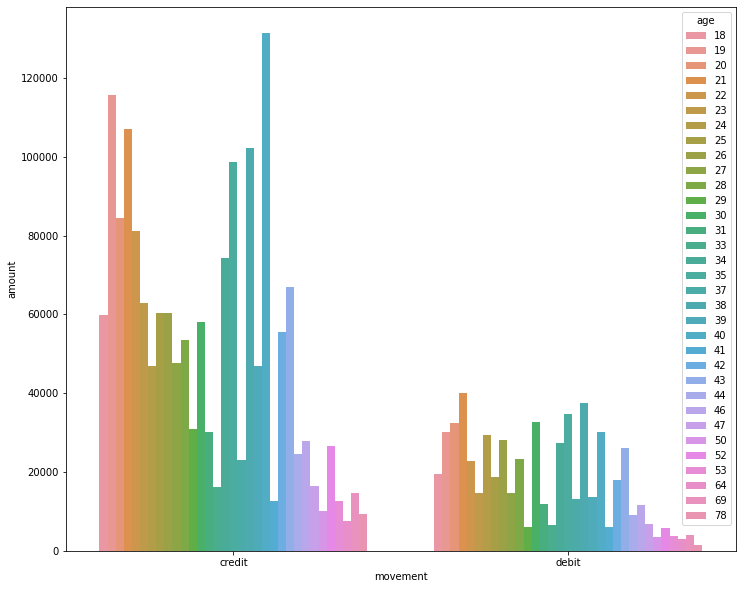

In [57]:
#Barplot according to age

plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_total)

# Debit-Credit Transaction Mean analysis By Age

In [58]:
#Mean transaction analysis by age

dc_age_mean= data.groupby(["movement","age"])["amount"].mean().reset_index()
dc_age_mean.head()

,movement,age,amount
0,credit,18,1867.585000
1,credit,19,2517.073043
2,credit,20,1509.139464
3,credit,21,1984.029630
4,credit,22,2080.120256


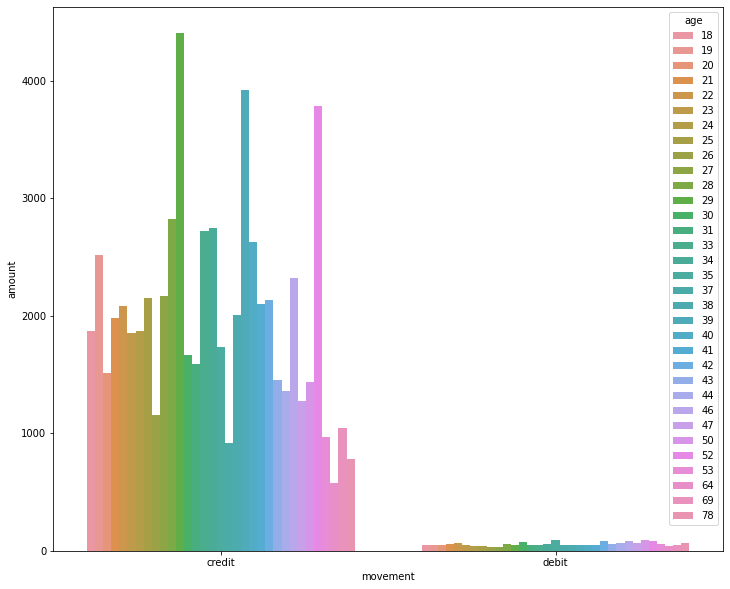

In [59]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_mean)

In [60]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Taking out the map coordinates

In [61]:
#taking relevant data

df=data[["amount",'merchant_long_lat',"merchant_suburb","movement","gender"]]

In [62]:
df=df.dropna()

In [63]:

df = df.reindex(columns = df.columns.tolist() + ['long','lat'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 7 columns):
amount               7717 non-null float64
merchant_long_lat    7717 non-null object
merchant_suburb      7717 non-null object
movement             7717 non-null object
gender               7717 non-null object
long                 0 non-null float64
lat                  0 non-null float64
dtypes: float64(3), object(4)
memory usage: 482.3+ KB


In [65]:
#Extracting the latitude and longitude data

longitude=[]
latitude=[]

for row in df['merchant_long_lat']:
    
    longitude.append(row.split(' ')[0])
    latitude.append(row.split(' ')[1])
    
df["long"]=longitude
df["lat"]=latitude

In [66]:
df.head()

,amount,merchant_long_lat,merchant_suburb,movement,gender,long,lat
0,16.25,153.38 -27.99,Ashmore,debit,F,153.38,-27.99
1,14.19,151.21 -33.87,Sydney,debit,F,151.21,-33.87
2,6.42,151.21 -33.87,Sydney,debit,M,151.21,-33.87
3,40.90,153.05 -26.68,Buderim,debit,F,153.05,-26.68
4,3.25,153.44 -28.06,Mermaid Beach,debit,F,153.44,-28.06


In [67]:
#Making the values numeric

df[["long", "lat"]] = df[["long", "lat"]].apply(pd.to_numeric)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 7 columns):
amount               7717 non-null float64
merchant_long_lat    7717 non-null object
merchant_suburb      7717 non-null object
movement             7717 non-null object
gender               7717 non-null object
long                 7717 non-null float64
lat                  7717 non-null float64
dtypes: float64(3), object(4)
memory usage: 482.3+ KB


In [69]:
#The maximum ranges in longitude and latitude

ranges = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))
print(ranges)

(113.83, 153.61, -43.31, -12.33)


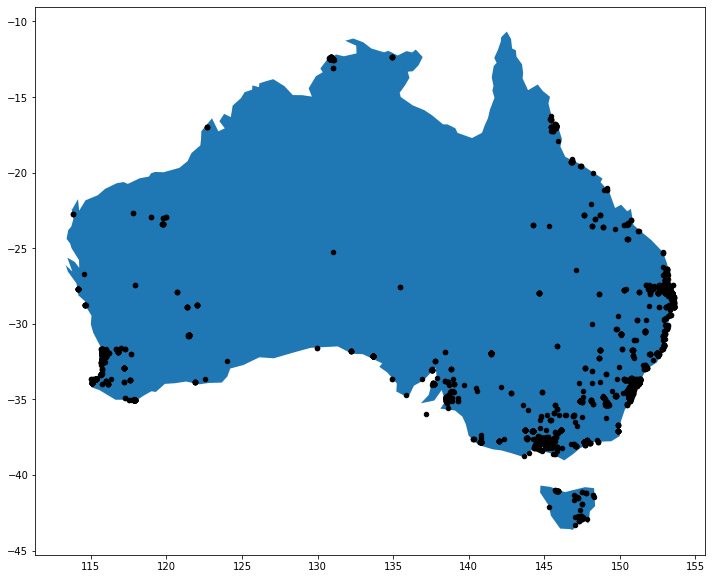

In [70]:
#Plotting the transactions over the map of australia

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#selecting australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

aus =  world[world.name == "Australia"]


gdf.plot(ax=aus.plot(figsize=(12, 12)), marker='o', color='black', markersize=20)

In [71]:
gdf.head()

,amount,merchant_long_lat,merchant_suburb,movement,gender,long,lat,geometry
0,16.25,153.38 -27.99,Ashmore,debit,F,153.38,-27.99,POINT (153.38000 -27.99000)
1,14.19,151.21 -33.87,Sydney,debit,F,151.21,-33.87,POINT (151.21000 -33.87000)
2,6.42,151.21 -33.87,Sydney,debit,M,151.21,-33.87,POINT (151.21000 -33.87000)
3,40.90,153.05 -26.68,Buderim,debit,F,153.05,-26.68,POINT (153.05000 -26.68000)
4,3.25,153.44 -28.06,Mermaid Beach,debit,F,153.44,-28.06,POINT (153.44000 -28.06000)


# WordCloud

In [72]:
name_trans=data.groupby(["first_name"])["amount"].mean().reset_index()
name_trans

,first_name,amount
0,Abigail,291.293333
1,Alexander,304.375604
2,Amy,119.057581
3,Andrew,318.977941
4,Antonio,192.534870
...,...,...
75,Tim,515.583846
76,Timothy,175.425000
77,Tonya,99.569658
78,Tyler,192.216193


In [73]:
tuple_name = [tuple(x) for x in name_trans.values]

(-0.5, 1399.5, 1199.5, -0.5)

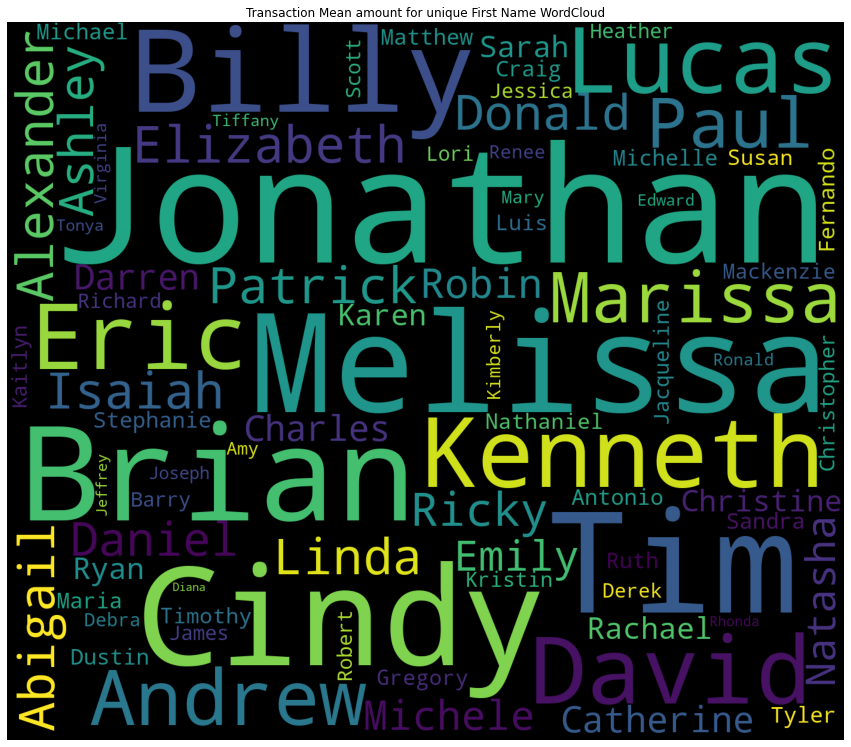

In [74]:
plt.subplots(figsize=(15,15))
wordcloud2 = WordCloud(width=1400,height=1200).generate_from_frequencies(dict(tuple_name))
plt.title('Transaction Mean amount for unique First Name WordCloud')

plt.imshow(wordcloud2)
plt.axis("off")

# Grouping customers by their Mean Balance and Transaction Amount

In [75]:
data_cust=data[["customer_id","first_name","age","balance",'amount']]

In [76]:
customer=data_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()

In [77]:
customer

,customer_id,age,first_name,balance,amount
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603
1,CUS-1117979751,21,Lucas,9829.929000,339.843700
2,CUS-1140341822,28,Dustin,5699.212250,212.632500
3,CUS-1147642491,34,Robin,9032.841186,245.600169
4,CUS-1196156254,34,Jessica,22272.433755,147.145796
...,...,...,...,...,...
95,CUS-72755508,35,Kimberly,4497.557069,197.213276
96,CUS-809013380,21,Kaitlyn,3756.902903,151.694274
97,CUS-860700529,30,Jeffrey,3462.276009,77.681888
98,CUS-880898248,26,Robert,8528.830385,146.954487


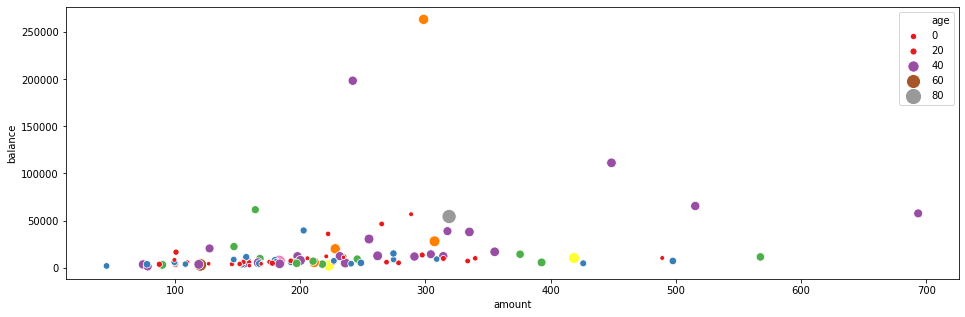

In [78]:
plt.figure(figsize=(16, 5))
sns.scatterplot(y="balance", x="amount",hue="age", palette="Set1", size="age",sizes=(20, 200), data=customer)

# Customer Segmentation- 2D

In [79]:
#customer["amount"]=customer["amount"]/100

In [80]:
#customer["balance"]=customer["balance"]/100

In [81]:
#KMeans clustering

from sklearn.cluster import KMeans

In [82]:
X=customer[["balance","amount"]].values
X.shape

(100, 2)

In [83]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

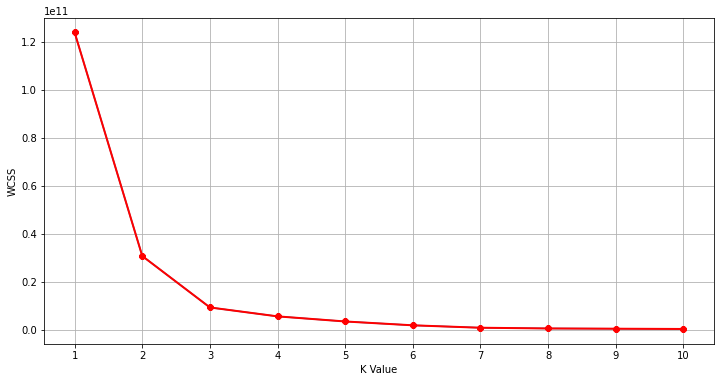

In [84]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [85]:
#this is known as the elbow graph , the x axis being the number of clusters
#the number of clusters is taken at the elbow joint point
#this point is the point where making clusters is most relevant
#the numbers of clusters is kept at maximum

In [86]:
km1=KMeans(n_clusters=3)


In [87]:
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
y=km1.predict(X)

In [89]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

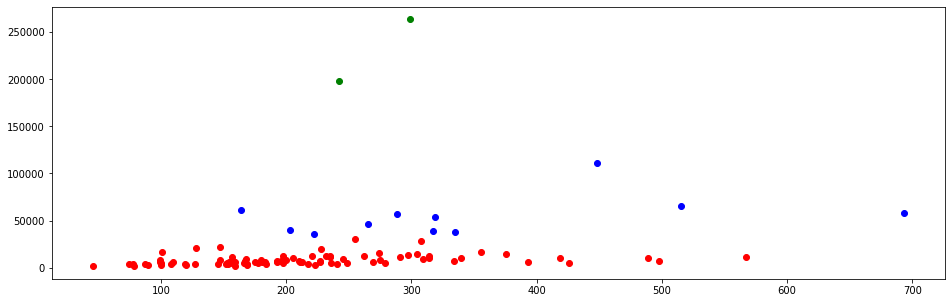

In [90]:

plt.figure(figsize=(16, 5))
plt.scatter(X[y==0,1],X[y==0,0],color='red')
plt.scatter(X[y==1,1],X[y==1,0],color='green')
plt.scatter(X[y==2,1],X[y==2,0],color='blue')


In [91]:
#There seems to be 3 clusters, the large cluster of maximum people with normal financial resources
#The next cluster with better financial resources
#The top cluster has only 2 customers with highest financial resources

# 3D customer segmentation

In [92]:
#We shall add age as a feature and try to group customers on a 3D plane

from mpl_toolkits.mplot3d import Axes3D

In [93]:
X=customer[["balance","amount","age"]].values
X.shape

(100, 3)

In [94]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

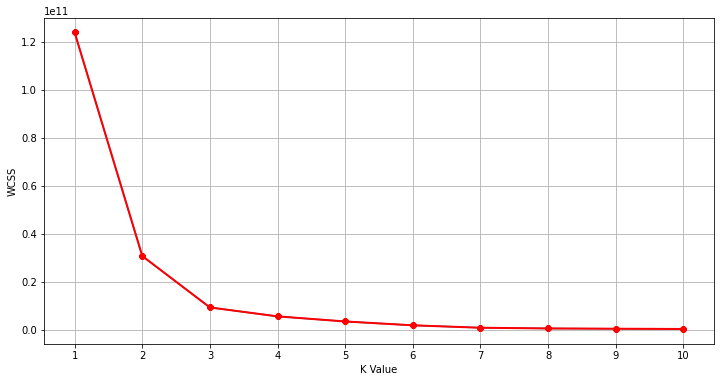

In [95]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [96]:
km2 = KMeans(n_clusters=3)
clusters = km2.fit_predict(X)
customer["label"] = clusters

In [97]:
customer

,customer_id,age,first_name,balance,amount,label
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603,0
1,CUS-1117979751,21,Lucas,9829.929000,339.843700,0
2,CUS-1140341822,28,Dustin,5699.212250,212.632500,0
3,CUS-1147642491,34,Robin,9032.841186,245.600169,0
4,CUS-1196156254,34,Jessica,22272.433755,147.145796,0
...,...,...,...,...,...,...
95,CUS-72755508,35,Kimberly,4497.557069,197.213276,0
96,CUS-809013380,21,Kaitlyn,3756.902903,151.694274,0
97,CUS-860700529,30,Jeffrey,3462.276009,77.681888,0
98,CUS-880898248,26,Robert,8528.830385,146.954487,0


Text(0.5, 0, 'amount')

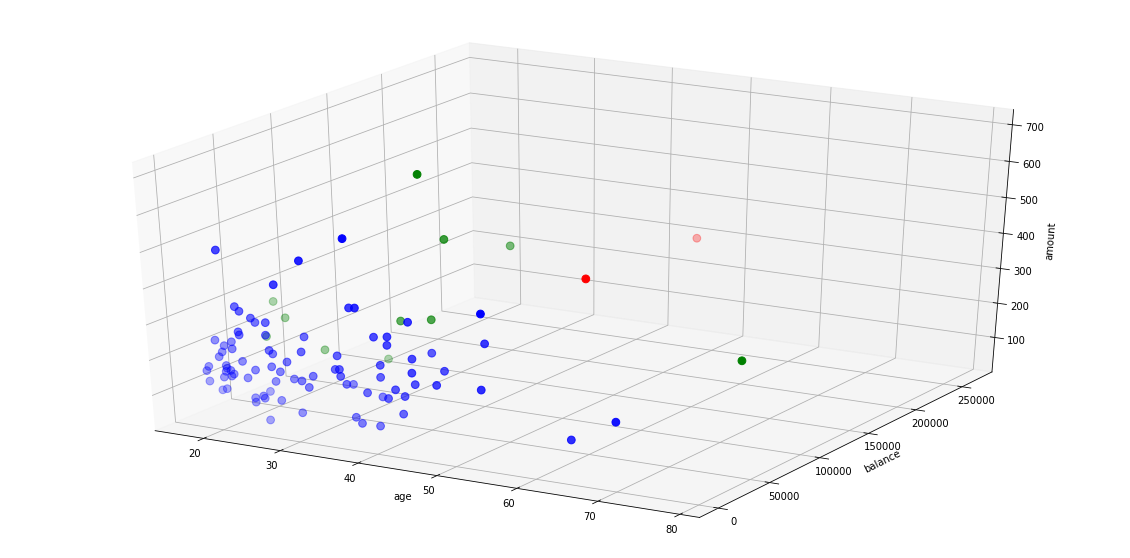

In [98]:
#The 3D plot

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.age[customer.label == 0], customer["balance"][customer.label == 0], customer["amount"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.age[customer.label == 1], customer["balance"][customer.label == 1], customer["amount"][customer.label == 1], c='red', s=60)
ax.scatter(customer.age[customer.label == 2], customer["balance"][customer.label == 2], customer["amount"][customer.label == 2], c='green', s=60)
plt.xlabel("age")
plt.ylabel("balance")
ax.set_zlabel('amount')

In [99]:
#By adding age, here also we see 3 clusters, 1 very large, 2nd of small size and 3rd of 2 customer

In [100]:
cust1=customer[customer["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["customer_id"].values)
print("--------------------------------------------")
cust2=customer[customer["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["customer_id"].values)
print("--------------------------------------------")
cust3=customer[customer["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["customer_id"].values)
print("--------------------------------------------")

Number of customer in 1st group= 2
They are - ['CUS-2370108457' 'CUS-527400765']
--------------------------------------------
Number of customer in 2nd group= 11
They are - ['CUS-1609060617' 'CUS-1646183815' 'CUS-1816693151' 'CUS-2059096722'
 'CUS-2663907001' 'CUS-2819545904' 'CUS-3117610635' 'CUS-3151318058'
 'CUS-3249305314' 'CUS-3462882033' 'CUS-495599312']
--------------------------------------------
Number of customer in 3rd group= 87
They are - ['CUS-1005756958' 'CUS-1117979751' 'CUS-1140341822' 'CUS-1147642491'
 'CUS-1196156254' 'CUS-1220154422' 'CUS-1233833708' 'CUS-1271030853'
 'CUS-127297539' 'CUS-134193016' 'CUS-134833760' 'CUS-1388323263'
 'CUS-1433879684' 'CUS-1462656821' 'CUS-1478398256' 'CUS-1499065773'
 'CUS-1604596597' 'CUS-1614226872' 'CUS-1617121891' 'CUS-164374203'
 'CUS-1646621553' 'CUS-1654129794' 'CUS-1669695324' 'CUS-1739931018'
 'CUS-1790886359' 'CUS-1842679196' 'CUS-1892177589' 'CUS-1896554896'
 'CUS-1928710999' 'CUS-2031327464' 'CUS-2083971310' 'CUS-211074243